# Bank Customer Churn Analysis

## Introduction
This notebook presents a comprehensive analysis aimed at determining Bank Customer Churn, predicting whether a customer will leave the bank using robust and accurate classification models.

## Workflow

### 1. Data Cleaning
- Handle missing values
- Normalize data
- Format data
- Convert categorical data into quantitative

### 2. Exploratory Data Analysis (EDA)
- Descriptive Statistics
- Data Visualization

### 3. Model Training
- Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)

### 4. Model Evaluation
- Accuracy
- Jaccard Score
- F1 Score
- Log Loss

### 5. Model Deployment

## Database Information
- **RowNumber**: Record (row) number, no effect on the output.
- **CustomerId**: Random values, no effect on customer leaving the bank.
- **Surname**: Customer's surname, no impact on their decision to leave.
- **CreditScore**: Higher credit score, less likely to leave.
- **Geography**: Customer’s location can affect their decision to leave.
- **Gender**: Explore if gender plays a role in leaving.
- **Age**: Older customers are less likely to leave.
- **Tenure**: Number of years as a client; older clients are more loyal.
- **Balance**: Higher account balance, less likely to leave.
- **NumOfProducts**: Number of products purchased through the bank.
- **HasCrCard**: Whether a customer has a credit card; those with cards are less likely to leave.
- **IsActiveMember**: Active customers are less likely to leave.
- **EstimatedSalary**: Lower salary, more likely to leave.
- **Exited**: Whether the customer left the bank.
- **Complain**: Customer has complaints or not.
- **Satisfaction Score**: Score provided by the customer for complaint resolution.
- **Card Type**: Type of card held by the customer.
- **Points Earned**: Points earned by the customer for using credit card.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score,f1_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 1. Data Cleaning

In [4]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**Let's rename the columns**

In [5]:
df.rename(columns={"Satisfaction Score":"Satisfaction Score",
                   "Point Earned":"PointEarned",
                  "Card Type":"CardType"},inplace=True
         )

**Drop unnecessary columns:**

In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
CardType               object
PointEarned             int64
dtype: object

**We should convert categorical columns into quantitative columns**

In [8]:
categoricalCols = df.select_dtypes(include='object').columns
categoricalCols

Index(['Geography', 'Gender', 'CardType'], dtype='object')

In [9]:
for col in categoricalCols :
    print(df[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [10]:
for col in categoricalCols:
    dummyVar= pd.get_dummies(df[col]).astype(int)
    df=pd.concat([df,dummyVar],axis=1)
    
df.drop(columns=categoricalCols,inplace=True)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,PointEarned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


## 2. Exploratory Data Analysis (EDA)

In [11]:
df.shape

(10000, 21)

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,PointEarned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,...,606.515100,0.501400,0.250900,0.247700,0.454300,0.545700,0.250700,0.25020,0.249500,0.249600
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,...,225.924839,0.500023,0.433553,0.431698,0.497932,0.497932,0.433438,0.43315,0.432745,0.432803
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,...,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,...,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,...,605.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,...,801.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,...,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


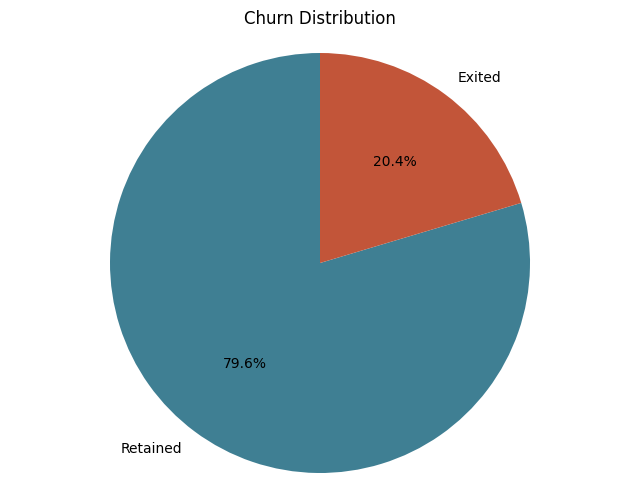

In [13]:
plt.figure(figsize=(8, 6))

labels = ['Retained', 'Exited']
colors = ['#3f7f93', '#c25539']

df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, labels=labels, startangle=90)
plt.title("Churn Distribution", loc='center')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

plt.show()

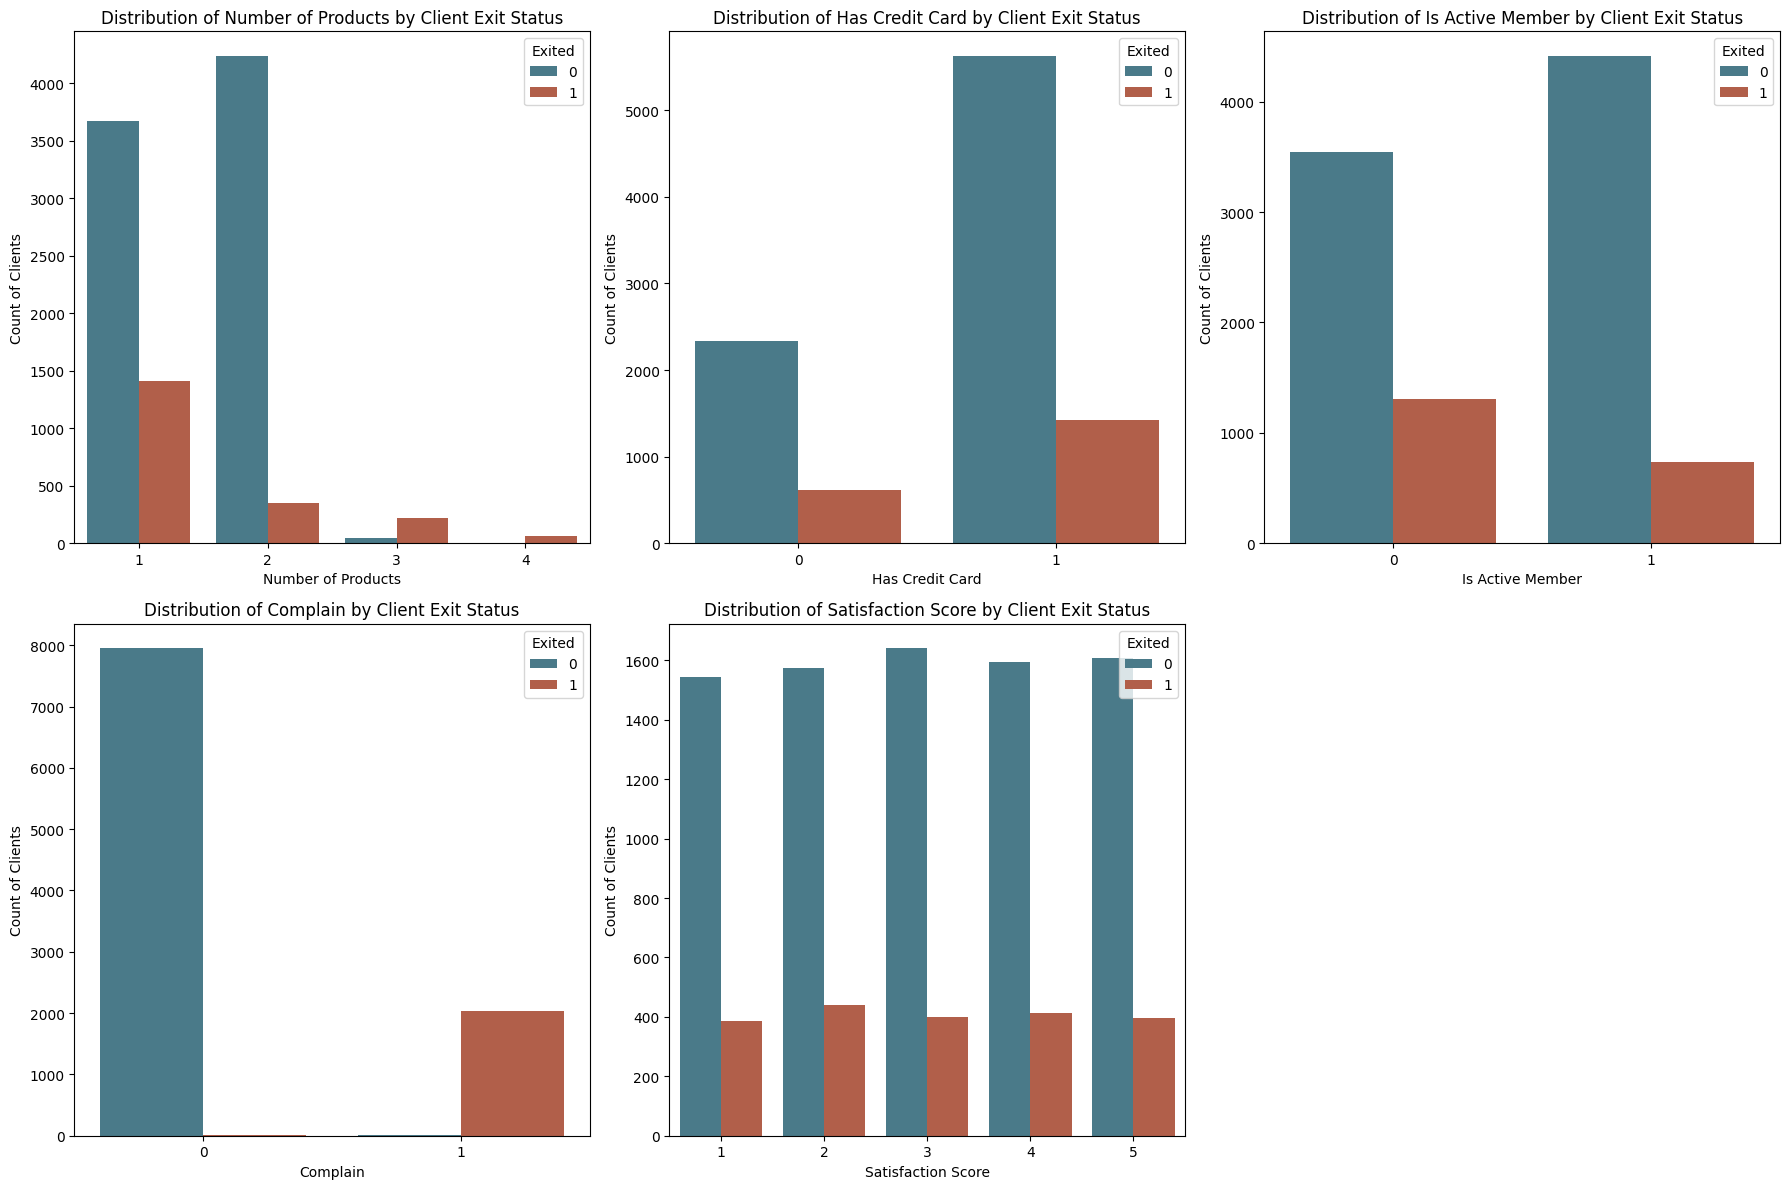

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

columns = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']
titles = ["Number of Products", "Has Credit Card", "Is Active Member", "Complain", "Satisfaction Score"]

for ax, column, title in zip(axes.flatten(), columns, titles):
    sns.countplot(data=df, x=column, hue='Exited', ax=ax, palette=colors)
    ax.set_title(f"Distribution of {title} by Client Exit Status", loc='center')
    ax.set_xlabel(title)
    ax.set_ylabel("Count of Clients")

# Remove the last subplot
fig.delaxes(axes[1][2])

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

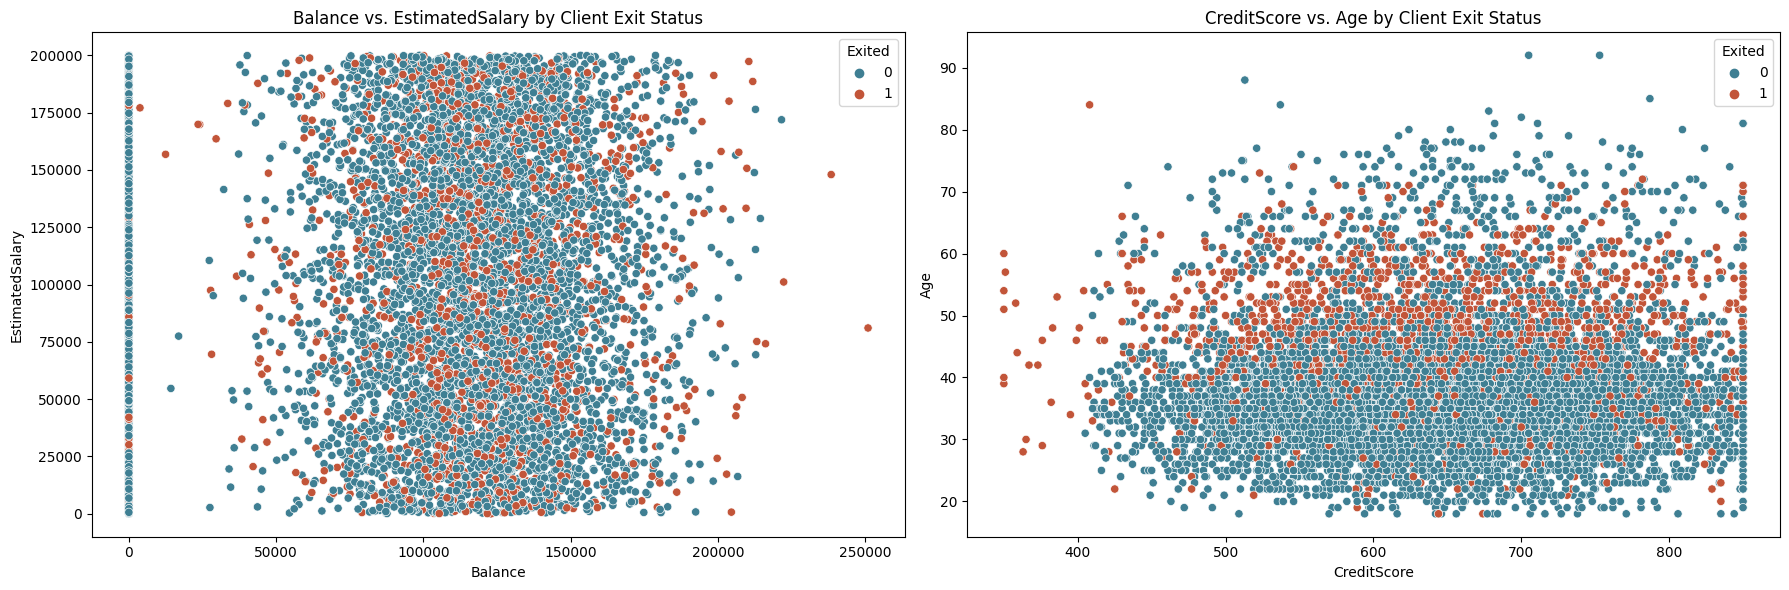

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

x_columns = ['Balance', 'CreditScore']
y_columns = ['EstimatedSalary', 'Age']

for ax, x_col, y_col in zip(axes.flatten(), x_columns, y_columns):
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='Exited', ax=ax, palette=colors)
    ax.set_title(f"{x_col} vs. {y_col} by Client Exit Status", loc='center')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

plt.tight_layout()

plt.show()


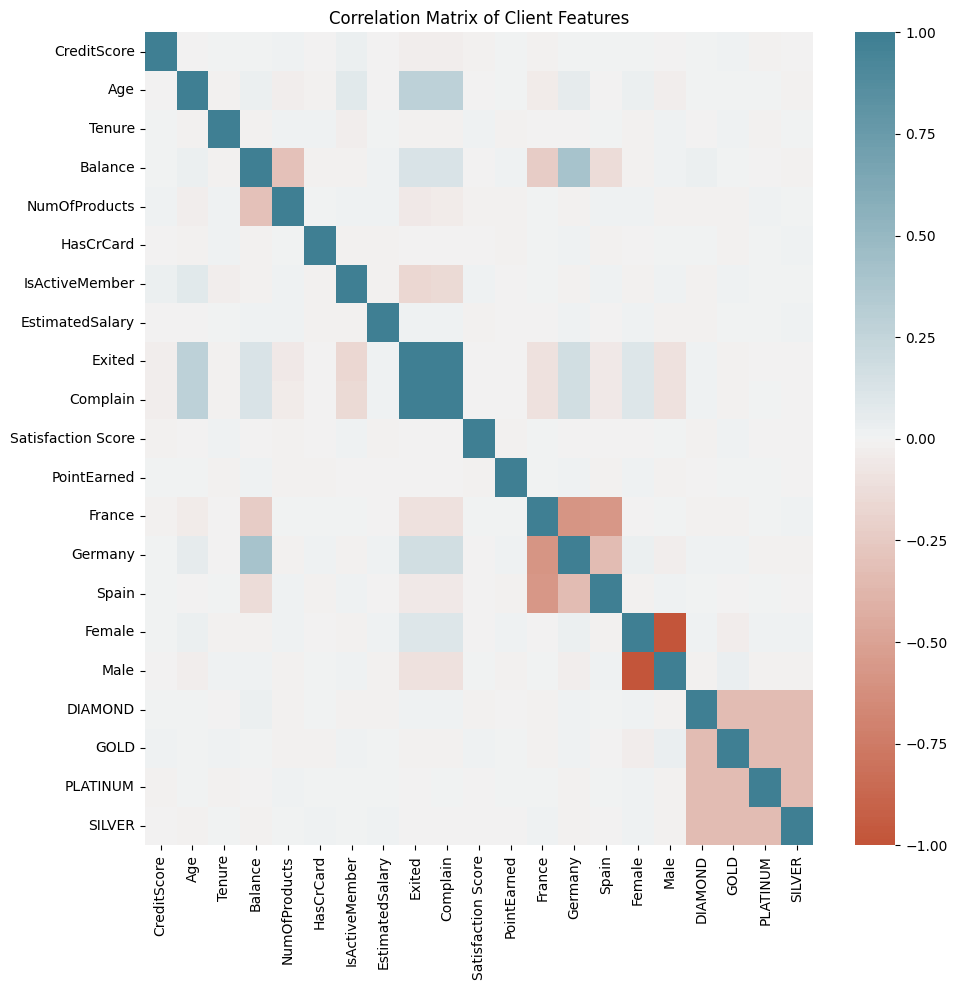

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False, cmap=sns.diverging_palette(20, 220, n=200), center=0)
plt.title('Correlation Matrix of Client Features', loc='center')
plt.tight_layout() 
plt.show()